In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 



In [9]:
data = pd.read_excel('Default (2) (1).xlsx') 

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [10]:
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [13]:
data.shape

(10000, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [16]:
data.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

## Exploratory Data analysis

In [18]:
# Statistical analysis
pd.set_option('display.precision', 2)  # Correct option


In [22]:
data.describe()

,Unnamed: 0,balance,income
count,10000.00,10000.00,10000.00
mean,5000.50,835.37,33516.98
std,2886.90,483.71,13336.64
min,1.00,0.00,771.97
25%,2500.75,481.73,21340.46
50%,5000.50,823.64,34552.64
75%,7500.25,1166.31,43807.73
max,10000.00,2654.32,73554.23


In [23]:
#Analysis of Zero Values in Predictors 
(data.balance == 0).sum(axis=0)

499

In [24]:
#Categorical Variable Analysis
data.student.value_counts() 

student
No     7056
Yes    2944
Name: count, dtype: int64

In [25]:
#Response Variable Analysis
data.default.value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [26]:
#Encode Categorical Variables 

data['default2'] = data.default.factorize()[0]
data['student2'] = data.student.factorize()[0]
data.head(3) 

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.53,44361.63,0,0
1,2,No,Yes,817.18,12106.13,0,1
2,3,No,No,1073.55,31767.14,0,0


In [46]:
# Graphical Representation 

data_dfno = data[data.default == 0].sample(frac=0.15)
datadfyes = data[data.default == 1]

# Use pd.concat() instead of append()
data_df = pd.concat([data_dfno, datadfyes])


C:\Users\bosss\AppData\Local\Temp\ipykernel_18484\3616703509.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default", y="balance", data=data, orient="v", ax=ax2, palette=c_palette)
C:\Users\bosss\AppData\Local\Temp\ipykernel_18484\3616703509.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default", y="income", data=data, orient="v", ax=ax3, palette=c_palette)


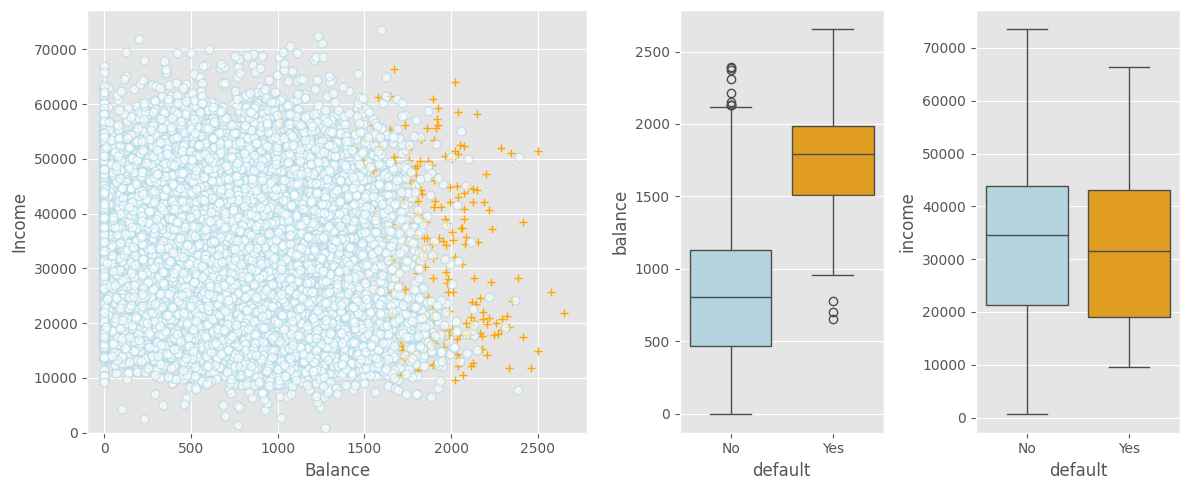

In [47]:
# Create figure and grid layout
fig = plt.figure(figsize=(12, 5))
gs = mpl.gridspec.GridSpec(1, 4)

# Create subplots
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:3])
ax3 = plt.subplot(gs[0, 3:4])

# Scatter plot (Balance vs Income)
ax1.scatter(
    data[data["default"] == "Yes"]["balance"], 
    data[data["default"] == "Yes"]["income"], 
    s=40, c="orange", marker="+", linewidths=1
)

ax1.scatter(
    data[data["default"] == "No"]["balance"], 
    data[data["default"] == "No"]["income"], 
    s=40, marker="o", linewidths=1, 
    edgecolors="lightblue", facecolors="white", alpha=0.6
)

# Set axis limits and labels
ax1.set_ylim(ymin=0)
ax1.set_ylabel("Income")
ax1.set_xlim(xmin=-100)
ax1.set_xlabel("Balance")

# Define color palette for boxplots
c_palette = {"No": "lightblue", "Yes": "orange"}

# Boxplots for balance and income
sns.boxplot(x="default", y="balance", data=data, orient="v", ax=ax2, palette=c_palette)
sns.boxplot(x="default", y="income", data=data, orient="v", ax=ax3, palette=c_palette)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [48]:
X_train = data.balance.values.reshape(-1,1)  
y = data.default
X_test = np.arange(data.balance.min(), ccdef.balance.max()).reshape(-1 ,1)

In [49]:
# Logistic refression using sklearn
import sklearn.linear_model as skl_lm

# Initialize and train Logistic Regression model
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)  # Ensure correct variable names

# Predict probabilities for test data
prob = clf.predict_proba(X_test)

# Print results
print("Classes:", clf.classes_)
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)


Classes: ['No' 'Yes']
Coefficients: [[0.00549829]]
Intercept: [-10.65028574]


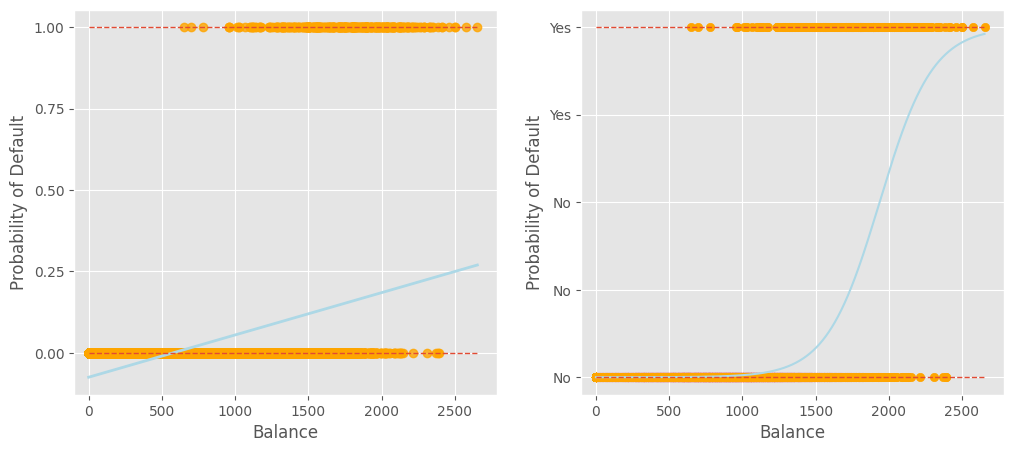

In [52]:
# Convert 'default' column from categorical ('Yes'/'No') to numerical (1/0)
data["default_numeric"] = data["default"].map({"No": 0, "Yes": 1})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Regression plot using numeric default values
sns.regplot(x=data["balance"], y=data["default_numeric"], order=1, ci=None,
            scatter_kws={'color': 'orange'},
            line_kws={'color': 'lightblue', 'lw': 2}, ax=ax1)

# Scatter plot for probabilities
ax2.scatter(X_train, y_train, color='orange')
ax2.plot(X_test, prob[:, 1], color='lightblue')

# Formatting axes
for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1],
              linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1],
              linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of Default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

plt.show()


In [55]:
# Print the trained Logistic Regression model
print(clf)  

# Print model details
print("Classes:", clf.classes_)
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)


LogisticRegression(solver='newton-cg')
Classes: ['No' 'Yes']
Coefficients: [[0.00549829]]
Intercept: [-10.65028574]


In [62]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sms 
pd.set_option('display.precision', 6)  # Correct
# Convert categorical values ('Yes'/'No') to numeric (1/0)
data["default_numeric"] = data["default"].map({"No": 0, "Yes": 1})

# Prepare features and target variable
X_train = sm.add_constant(data["balance"])  # Add constant for intercept
y_train = data["default_numeric"]  # Ensure the target variable is numeric

# Fit logistic regression model
est = sm.Logit(y_train, X_train).fit()
print(est.summary())


Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:        default_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                  0.4534
Time:                        16:05:47   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

In [64]:
est.summary2().tables[1] 

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [69]:
# Logistic Regression (Dummy Variable) Using statsmodel 
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sms

# Convert categorical values ('Yes'/'No') to numeric (1/0)
data["default_numeric"] = data["default"].map({"No": 0, "Yes": 1})
data["student_numeric"] = data["student"].map({"No": 0, "Yes": 1})

# Prepare features and target variable
X_train = sm.add_constant(data["student_numeric"])  # Add constant for intercept
y_train = data["default_numeric"]  # Use numeric target variable

# Fit logistic regression model
est = sms.Logit(y_train, X_train).fit()
print(est.summary())


Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        default_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                0.004097
Time:                        16:09:16   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student_numeri

In [74]:
# Multiple Logistic Regression 

# Convert categorical variables ('Yes'/'No') to numeric (1/0)
data["default_numeric"] = data["default"].map({"No": 0, "Yes": 1})
data["student_numeric"] = data["student"].map({"No": 0, "Yes": 1})

# Prepare features and target variable
X_train = sm.add_constant(data[['balance', 'income', 'student_numeric']])  # Include student as numeric
y_train = data["default_numeric"]  # Use numeric target variable

# Fit multiple logistic regression model
est = sms.Logit(y_train, X_train).fit()
print(est.summary().tables[1])  # Print model coefficients

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance             0.0057      0.000     24.737      0.000       0.005       0.006
income           3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_numeric    -0.6468      0.236     -2.738      0.006      -1.110      -0.184


In [75]:
# Create balance and default vectors for students 
X_train = data[data.student == 'Yes'].balance.values.reshape(-1,1)

y = data[data.student == 'Yes'].default

# Create balance and default vectors for non- students
X_train2 = data[data.student == 'No'].balance.values.reshape(-1,1)

y2 = data[data.student == 'No'].default

# Create test vector
X_test = np.arange(ccdef.balance.min(), ccdef.balance.max()).reshape(-1,1)

In [79]:
# Cofounding
# Convert 'default' to numeric if not already done
data["default_numeric"] = data["default"].map({"No": 0, "Yes": 1})

# Ensure X_train and y_train have the same length
X_train = data["balance"].values.reshape(-1, 1)
y_train = data["default_numeric"]

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Fit logistic regression model
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)

X_train shape: (10000, 1)
y_train shape: (10000,)


LogisticRegression(solver='newton-cg')

In [80]:
clf2.fit(X_train2,y2)

LogisticRegression(solver='newton-cg')

In [81]:
# Calculate Probabilities

prob = clf.predict_proba(X_test) 

prob2 = clf2.predict_proba(X_test) 

In [82]:
data.groupby(['student','default']).size().unstack('default') 

default,No,Yes
student,,
No,6850,206
Yes,2817,127


C:\Users\bosss\AppData\Local\Temp\ipykernel_18484\2653517751.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='student', y='balance', data=ccdef, orient='v', ax=ax2, palette=c_palette)


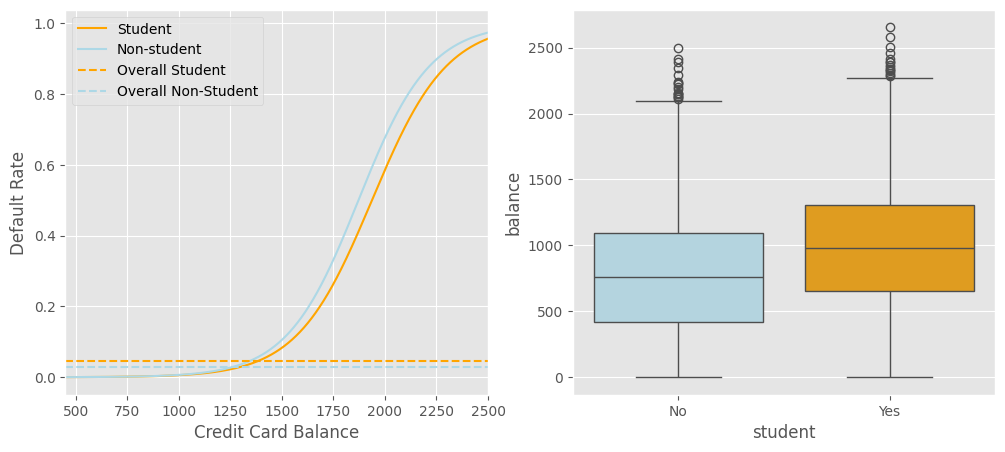

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left plot
ax1.plot(X_test, prob[:, 1], color='orange', label='Student')
ax1.plot(X_test, prob2[:, 1], color='lightblue', label='Non-student')

# Horizontal reference lines with correct syntax
ax1.hlines(127/2817, xmin=ax1.xaxis.get_data_interval()[0], 
           xmax=ax1.xaxis.get_data_interval()[1], colors='orange', 
           linestyles='dashed', label='Overall Student')

ax1.hlines(206/6850, xmin=ax1.xaxis.get_data_interval()[0], 
           xmax=ax1.xaxis.get_data_interval()[1], colors='lightblue', 
           linestyles='dashed', label='Overall Non-Student')

ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450, 2500)
ax1.legend(loc=2)

# Right plot (Corrected Seaborn boxplot syntax)
sns.boxplot(x='student', y='balance', data=ccdef, orient='v', ax=ax2, palette=c_palette)

plt.show()


In [87]:
# Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Ensure 'student' and 'default' are numeric
data["student2"] = data["student"].map({"No": 0, "Yes": 1})
data["default2"] = data["default"].map({"No": 0, "Yes": 1})

# Define features (X) and target variable (y)
X = data[['balance', 'income', 'student2']]
y = data['default2']

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

# Create DataFrame for true vs predicted values
data_df = pd.DataFrame({'True default status': y, 'Predicted default status': y_pred})

# Replace numeric values with categorical labels
data_df.replace(to_replace={0: 'No', 1: 'Yes'}, inplace=True)

# Group and count predictions
result = data_df.groupby(['Predicted default status', 'True default status']).count().unstack()

# Print result
print(result)


Empty DataFrame
Columns: []
Index: [No, Yes]


In [88]:
# Set decision probability threshold
decision_prob = 0.2

# Predict probabilities using LDA
y_prob = lda.predict_proba(X)  # No need to fit again

# Create DataFrame for true vs predicted values based on threshold
data_df = pd.DataFrame({
    'True default status': y,
    'Predicted default status': (y_prob[:, 1] > decision_prob).astype(int)  # Convert to 0/1
})

# Replace numeric values with categorical labels
data_df.replace(to_replace={0: 'No', 1: 'Yes'}, inplace=True)

# Print DataFrame
print(data_df.head())

 cc_df.groupby(['Predicted default status','True default status']).size().unstack('True default status') 

  True default status Predicted default status
0                  No                       No
1                  No                       No
2                  No                       No
3                  No                       No
4                  No                       No
